In [1]:
import torch

### Mini Batch

* 전체 데이터를 더 작은 단위로 나누어서 해당 단위로 학습하는 것

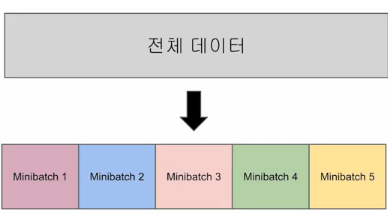

* 미니 배치 학습을 하게되면 미니 배치만큼만 가져가서 미니 배치에 대한 대한 비용(cost)를 계산하고, 경사 하강법을 수행합니다. 그리고 다음 미니 배치를 가져가서 경사 하강법을 수행하고 마지막 미니 배치까지 이를 반복합니다.
* 전체 데이터에 대한 학습이 1회 끝나면 1 에포크(Epoch)가 끝나게 됩니다.

* 전체 데이터에 대해서 한 번에 경사 하강법을 수행하는 방법을 '배치 경사 하강법'이라고 부릅니다. 반면, 미니 배치 단위로 경사 하강법을 수행하는 방법을 '미니 배치 경사 하강법'이라고 부릅니다.
* 배치 경사 하강법은 경사 하강법을 할 때, 전체 데이터를 사용하므로 가중치 값이 최적값에 수렴하는 과정이 매우 안정적이지만, 계산량이 너무 많이 듭니다. 
* 미니 배치 경사 하강법은 경사 하강법을 할 때, 전체 데이터의 일부만을 보고 수행하므로 최적값으로 수렴하는 과정에서 값이 조금 헤매기도 하지만 훈련 속도가 빠릅니다.
* 배치 크기는 보통 2의 제곱수를 사용합니다. ex) 2, 4, 8, 16, 32, 64... 그 이유는 CPU와 GPU의 메모리가 2의 배수이므로 배치크기가 2의 제곱수일 경우에 데이터 송수신의 효율을 높일 수 있다고 합니다.

## Iteration

* 이터레이션은 한 번의 에포크 내에서 이루어지는 매개 변수인 가중치 W와 b의 업데이트 횟수

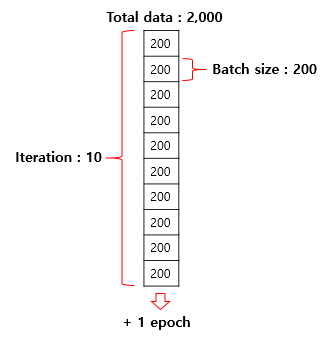

## Data Load

파이토치에서는 데이터를 좀 더 쉽게 다룰 수 있도록 유용한 도구로서 데이터셋(Dataset)과 데이터로더(DataLoader)를 제공합니다.


이를 사용하면 미니 배치 학습, 데이터 셔플(shuffle), 병렬 처리까지 간단히 수행할 수 있습니다. 기본적인 사용 방법은 Dataset을 정의하고, 이를 DataLoader에 전달하는 것

In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import TensorDataset # 텐서데이터셋 - 기본적으로 텐서를 입력으로 받음, 텐서 형태로 데이터를 정의
from torch.utils.data import DataLoader # 데이터로더

In [7]:
x_train  =  torch.FloatTensor([[73,  80,  75], 
                               [93,  88,  93], 
                               [89,  91,  90], 
                               [96,  98,  100],   
                               [73,  66,  70]])  
y_train  =  torch.FloatTensor([[152],  [185],  [180],  [196],  [142]])

In [10]:
dataset = TensorDataset(x_train, y_train)

dataloader = DataLoader(dataset, batch_size=2, shuffle=True) # shuffle=True이면, Epoch마다 데이터셋을 섞어서 데이터가 학습되는 순서를 바꿔줌 - 학습과정에서 데이터의 순서를 기억할수가 있기 때문에 shuffle은 True로 하는 것이 좋음
# 만약 5개 샘플로 구성된 데이터셋에 배치크기를 2로 하면, 2 / 2 / 1개로 배치를 설정하게됨

In [12]:
model = nn.Linear(3,1)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5) 

In [14]:
nb_epochs = 20
for epoch in range(nb_epochs + 1):
    for batch_idx, samples in enumerate(dataloader):
        # print(batch_idx)
        # print(samples)
        x_train, y_train = samples
        # H(x) 계산
        prediction = model(x_train)

        # cost 계산
        cost = F.mse_loss(prediction, y_train)

        # cost로 H(x) 계산
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        print('Epoch {:4d}/{} Batch {}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, batch_idx+1, len(dataloader),
            cost.item()
            ))

Epoch    0/20 Batch 1/3 Cost: 34052.921875
Epoch    0/20 Batch 2/3 Cost: 8375.885742
Epoch    0/20 Batch 3/3 Cost: 3994.011963
Epoch    1/20 Batch 1/3 Cost: 916.313232
Epoch    1/20 Batch 2/3 Cost: 233.227509
Epoch    1/20 Batch 3/3 Cost: 105.727638
Epoch    2/20 Batch 1/3 Cost: 23.834675
Epoch    2/20 Batch 2/3 Cost: 9.611834
Epoch    2/20 Batch 3/3 Cost: 2.381788
Epoch    3/20 Batch 1/3 Cost: 1.291027
Epoch    3/20 Batch 2/3 Cost: 1.873810
Epoch    3/20 Batch 3/3 Cost: 0.030179
Epoch    4/20 Batch 1/3 Cost: 0.014401
Epoch    4/20 Batch 2/3 Cost: 1.446111
Epoch    4/20 Batch 3/3 Cost: 2.593773
Epoch    5/20 Batch 1/3 Cost: 0.811251
Epoch    5/20 Batch 2/3 Cost: 1.789400
Epoch    5/20 Batch 3/3 Cost: 0.007167
Epoch    6/20 Batch 1/3 Cost: 0.715237
Epoch    6/20 Batch 2/3 Cost: 0.491191
Epoch    6/20 Batch 3/3 Cost: 2.284555
Epoch    7/20 Batch 1/3 Cost: 0.663974
Epoch    7/20 Batch 2/3 Cost: 1.757428
Epoch    7/20 Batch 3/3 Cost: 0.023831
Epoch    8/20 Batch 1/3 Cost: 0.840039
Epoch   

In [15]:
# 임의의 입력 [73, 80, 75]를 선언
new_var =  torch.FloatTensor([[73, 80, 75]]) 
# 입력한 값 [73, 80, 75]에 대해서 예측값 y를 리턴받아서 pred_y에 저장
pred_y = model(new_var) 
print("훈련 후 입력이 73, 80, 75일 때의 예측값 :", pred_y) 

훈련 후 입력이 73, 80, 75일 때의 예측값 : tensor([[150.8919]], grad_fn=<AddmmBackward>)


## Custom Dataset

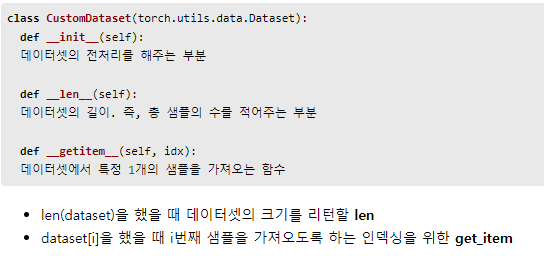

In [24]:
# 커스텀 데이터셋으로 선형 회귀 구현
import torch
import torch.nn.functional as F

from torch.utils.data import Dataset
from torch.utils.data import DataLoader

# Dataset 상속
class CustomDataset(Dataset): 
    def __init__(self):
        self.x_data = [[73, 80, 75],
                       [93, 88, 93],
                       [89, 91, 90],
                       [96, 98, 100],
                       [73, 66, 70]]
        self.y_data = [[152], [185], [180], [196], [142]]

    # 총 데이터의 개수를 리턴
    def __len__(self): 
        return len(self.x_data)

    # 인덱스를 입력받아 그에 맵핑되는 입출력 데이터를 파이토치의 Tensor 형태로 리턴
    def __getitem__(self, idx): 
        x = torch.FloatTensor(self.x_data[idx])
        y = torch.FloatTensor(self.y_data[idx])
        return x, y

In [25]:
dataset = CustomDataset()
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

In [26]:
model = torch.nn.Linear(3,1)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5) 

In [27]:
nb_epochs = 20
for epoch in range(nb_epochs + 1):
    for batch_idx, samples in enumerate(dataloader):
        # print(batch_idx)
        # print(samples)
        x_train, y_train = samples
        # H(x) 계산
        prediction = model(x_train)

        # cost 계산
        cost = F.mse_loss(prediction, y_train)

        # cost로 H(x) 계산
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        print('Epoch {:4d}/{} Batch {}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, batch_idx+1, len(dataloader),
            cost.item()
            ))

Epoch    0/20 Batch 1/3 Cost: 10698.292969
Epoch    0/20 Batch 2/3 Cost: 8046.339355
Epoch    0/20 Batch 3/3 Cost: 1579.049805
Epoch    1/20 Batch 1/3 Cost: 383.757202
Epoch    1/20 Batch 2/3 Cost: 139.619141
Epoch    1/20 Batch 3/3 Cost: 25.041521
Epoch    2/20 Batch 1/3 Cost: 18.095863
Epoch    2/20 Batch 2/3 Cost: 3.762260
Epoch    2/20 Batch 3/3 Cost: 0.012100
Epoch    3/20 Batch 1/3 Cost: 1.378960
Epoch    3/20 Batch 2/3 Cost: 1.844406
Epoch    3/20 Batch 3/3 Cost: 1.084285
Epoch    4/20 Batch 1/3 Cost: 1.834182
Epoch    4/20 Batch 2/3 Cost: 0.369126
Epoch    4/20 Batch 3/3 Cost: 0.015644
Epoch    5/20 Batch 1/3 Cost: 0.523790
Epoch    5/20 Batch 2/3 Cost: 1.734085
Epoch    5/20 Batch 3/3 Cost: 0.023559
Epoch    6/20 Batch 1/3 Cost: 0.706421
Epoch    6/20 Batch 2/3 Cost: 1.324321
Epoch    6/20 Batch 3/3 Cost: 0.242744
Epoch    7/20 Batch 1/3 Cost: 0.659659
Epoch    7/20 Batch 2/3 Cost: 0.197446
Epoch    7/20 Batch 3/3 Cost: 2.172943
Epoch    8/20 Batch 1/3 Cost: 1.895728
Epoch    

In [28]:
# 임의의 입력 [73, 80, 75]를 선언
new_var =  torch.FloatTensor([[73, 80, 75]]) 
# 입력한 값 [73, 80, 75]에 대해서 예측값 y를 리턴받아서 pred_y에 저장
pred_y = model(new_var) 
print("훈련 후 입력이 73, 80, 75일 때의 예측값 :", pred_y) 

훈련 후 입력이 73, 80, 75일 때의 예측값 : tensor([[150.1973]], grad_fn=<AddmmBackward>)
